<a href="https://colab.research.google.com/github/shuuuuyu/113-2-Generative-AI/blob/main/assignment_3_GAN%E6%A8%A1%E5%9E%8B(%E4%B8%BB%E9%A1%8C%E4%B8%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 主題一:找一個GAN模型來實際操作，並且試著多生幾張圖片
- 附上該模型來源(連結)，並簡單介紹這個模型。
- 同主題多生成幾張，並且附上輸入/輸出圖。(最多五組)
- 比較看看，為什麼現在較沒有人在使用GAN來生圖？
- 可以自行增加其他內容。

## 1. 模型來源

- toonify:https://colab.research.google.com/drive/175lTdns5He2gFMyBvXRMlYjjErZCd-8Z?usp=sharing#scrollTo=e75b9858-4a6d-4205-be00-1926b745ad66
- 功能:
    1. 使用預訓練模型(如 FFHQ)或上傳你自己的圖像資料集

    2. 訓練自己的 StyleGAN2 模型（或 fine-tune 現有模型）

    3. 產生新的圖片

    4. 下載訓練結果與產生的圖片
- 步驟說明:
    1. 環境設定與安裝:安裝必要的套件，如 StyleGAN2-ADA、DLib、Pillow 等
    2. 資料準備:使用自己的圖片資料集或下載預設的公開人臉資料集(如:FFHQ)再轉換成 .tfrecords 格式以供訓練
    3. 模型訓練:使用 StyleGAN2-ADA 進行模型訓練
    4. 模型測試與圖片生成

## 2. 範例圖片與說明

### 此部分針對模型訓練與測試的程式碼進行說明:
- inversion(反向映射):將輸入的圖片轉換為 latent code(風格向量)，因為要讓 StyleGAN 處理圖片，就必須先得到這種 latent 表示。
- 模型會嘗試找到一個 latent 向量，讓生成器可以重建出與原圖外觀相似的圖片。這是風格轉換的前置步驟。

    1. **decode**:把單張圖片做 transform(如 resize、tensor 化、normalize)，加上 batch 維度（因為模型期望是 batch 輸入），丟進 GPU 上運算(.cuda())
    2. **Invert**(風格向量推估):以一張「平均臉」作為初始生成圖(y_hat)，再透過多次迭代，讓生成結果逐步接近原圖。這個過程會產生對應的 latent 向量(tent)，作為之後風格化的基礎。
    3. **Toonify**(卡通風格轉換):將原始圖與生成圖(y_hat)作為輸入，送入 net2 模型。這是一個已經融合卡通風格的 StyleGAN 模型，能夠產出風格轉換後的卡通圖。最終的卡通效果，是根據原圖的內容與對應 latent code 進行微調後生成的。

- 原圖:
    - 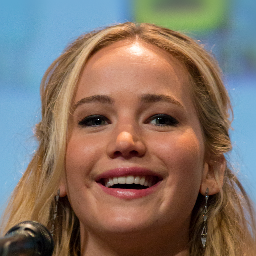

- 人臉重建(編碼):
    - 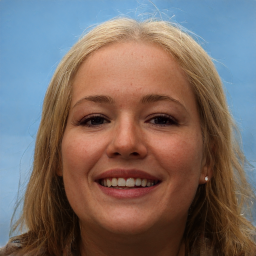
    - 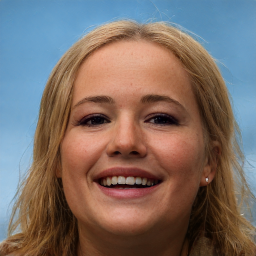
    - 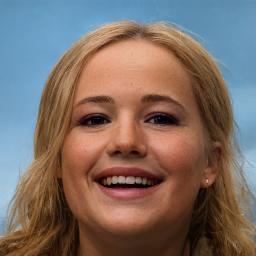


- 風格變換:
    - 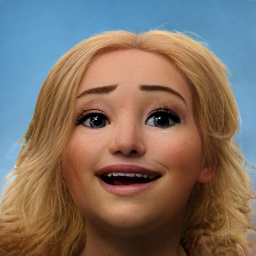
    - 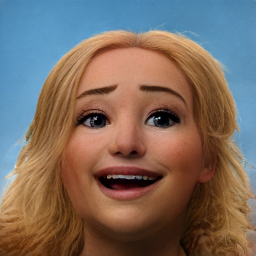
    - 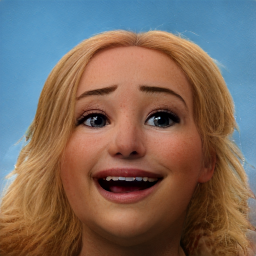


## 3. 目前較少人使用的原因

- 我的想法:使用 GAN 時，我發現需要重複迭代運算來逼近輸出結果，這可能會讓圖片逐漸偏離原圖，甚至出現失真現象。而這個過程要「何時停下來」很難自動判斷，停太早不夠像、算太久可能變形。此外，GAN 的輸出自由度較低，控制困難，只能「引導」，無法精確指定細節，因此使用上不太方便。
- AI的想法:
    1. 可控性差：傳統的 GAN 模型像是 StyleGAN，對 latent code（風格向量）只能間接控制，難以做到精確修改。例如：「讓他戴眼鏡，但不要改變臉型」這類需求，在 GAN 上很難實現。

    2. 訓練穩定性差 & 資源需求高：GAN 在訓練時容易出現 mode collapse（只會生成少數樣貌）、梯度消失等問題，訓練過程非常不穩定。此外，它需要大量資料與高昂的運算成本，才能訓練出穩定又高質量的模型。

    3. 生成品質不如 diffusion models：近年如 Diffusion Model（擴散模型） 的興起（如 Stable Diffusion、DALL·E 3），提供了更穩定、更可控、畫質更高的生成方式，而且能直接加入文字指令（text prompt）控制細節，幾乎取代了以往用 GAN 做的圖像生成任務。

    4. 缺乏語意理解：GAN 雖然擅長合成圖像，但它對語意理解非常有限，不像擴散模型或 transformer-based 模型可以「理解你想畫什麼」並畫出來。

## 4. 其他練習

模型:https://this-person-does-not-exist.com/en

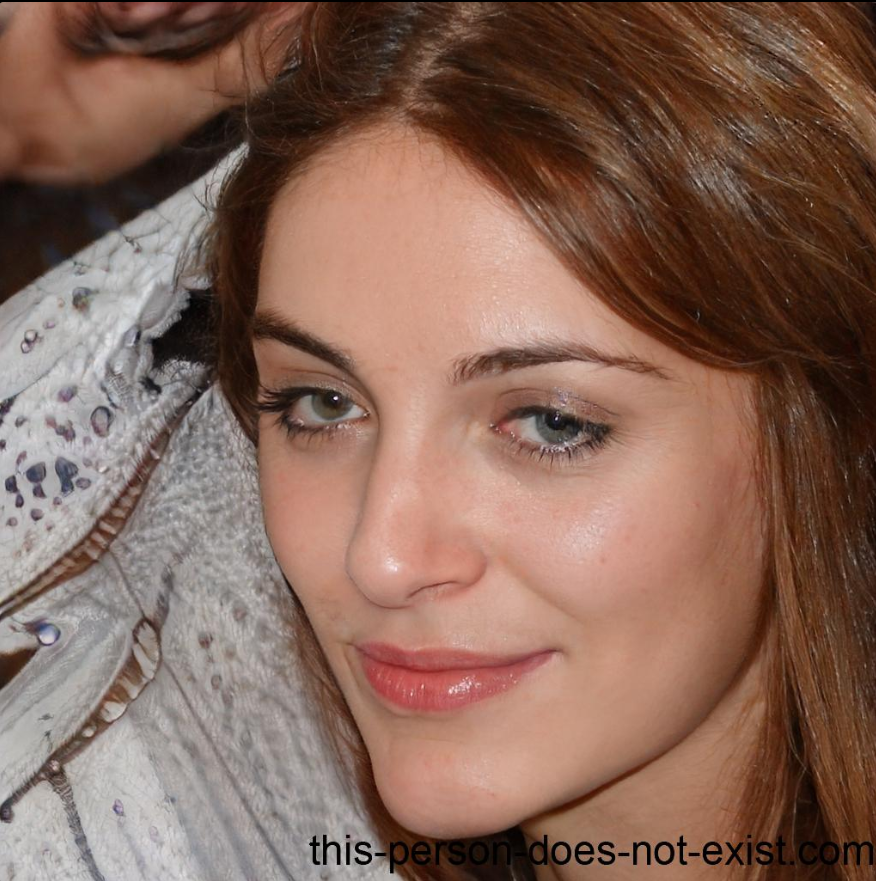